# Course Project: Sentiment Analysis
We have provided some synthetic (fake, semi-randomly generated) twitter data in a csv file named `project_twitter_data.csv` which has the text of a tweet, the number of retweets of that tweet, and the number of replies to that tweet. We have also words that express positive sentiment and negative sentiment, in the files `positive_words.txt` and `negative_words.txt`.

Your task is to build a sentiment classifier, which will detect how positive or negative each tweet is. You will create a csv file, which contains columns for the Number of Retweets, Number of Replies, Positive Score (which is how many happy words are in the tweet), Negative Score (which is how many angry words are in the tweet), and the Net Score for each tweet. At the end, you upload the csv file to Excel or Google Sheets, and produce a graph of the Net Score vs Number of Retweets.

## Step 1: Striping Punctuation
To start, define a function called `strip_punctuation` which takes one parameter, a string which represents a word, and removes characters considered punctuation from everywhere in the word.

In [3]:
# Defining the punctuation characters
punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']

def strip_punctuation(str1): 
    for char in str1:
        if char in punctuation_chars:
            str1 = str1.replace(char, '')
    
    return str1



Original word, Word wihout punctuation
#Amazing -> Amazing
wow! -> wow
#in.cred..ible! -> incredible
wonderful -> wonderful


## Testing the function

In [5]:
# Testing the function:
words_with_punctuation = ['#Amazing', 'wow!', '#in.cred..ible!', 'wonderful']

# Printing the words before and after the punctuation_characters are removed:
print('Original word, Word wihout punctuation')
for word in words_with_punctuation:
    print(f'{word} -> {strip_punctuation(word)}')

Original word, Word wihout punctuation
#Amazing -> Amazing
wow! -> wow
#in.cred..ible! -> incredible
wonderful -> wonderful


## Step 2: Getting the Positive Words from a Tweet
Next, we define a function called `get_pos` which takes one parameter, a string which represents one or more sentences, and calculates how many words in the string are considered positive words. Use the list, `positive_words` to determine what words will count as positive. The function should return a positive integer - how many occurrences there are of positive words in the text. Note that all of the words in `positive_words` are lower cased, so you’ll need to convert all the words in the input string to lower case as well.

### Extracting the Positive Words from the `positive_words.txt`

In [4]:
# list of positive words to use
positive_words = []
with open("positive_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            positive_words.append(lin.strip())


### Function definition

In [6]:
def get_pos(str1):
    # Remove Punctuation:
    str1 = strip_punctuation(str1)
    
    # Counting words:
    words = str1.strip().split()
    
    # Counting positive words:
    count = 0
    for word in words:
        word = word.lower()
        if word in positive_words:
            count+=1
    return count

### Testing the function: `get_pos`

In [14]:
pos_tweets = [
    'what a truly wonderful day it is today! #incredible',
    'what a truly Wonderful day it is today! #incredible',
    'what a truly wonderful day it is today!',
    'the weather is what it is.',
    "The weather truely is abnormal - it's october and already snowing!"
    ]

print('Counting positive words in a tweet:')
for tweet in pos_tweets:
    print(f'{tweet} ---> has {get_pos(tweet)} positive words in it.')

Counting positive words in a tweet:
what a truly wonderful day it is today! #incredible ---> has 2 positive words in it.
what a truly Wonderful day it is today! #incredible ---> has 2 positive words in it.
what a truly wonderful day it is today! ---> has 1 positive words in it.
the weather is what it is. ---> has 0 positive words in it.
The weather truely is abnormal - it's october and already snowing! ---> has 0 positive words in it.


## Step 3: Getting the Negative Words from a Tweet
Next, we define a function called `get_neg` which takes one parameter, a string which represents one or more sentences, and calculates how many words in the string are considered negative words. Use the list, `negative_words` to determine what words will count as negative. The function should return a positive integer - how many occurrences there are of negative words in the text. Note that all of the words in `negative_words` are lower cased, so you’ll need to convert all the words in the input string to lower case as well.

### Extracting the negative words from the `negative_words.txt`

In [13]:
negative_words = []
with open("negative_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            negative_words.append(lin.strip())

### Function definition

In [12]:
def get_neg(str1):
    # Remove Punctuation:
    str1 = strip_punctuation(str1)
    
    # Counting words:
    words = str1.strip().split()
    
    # Counting positive words:
    count = 0
    for word in words:
        word = word.lower()
        if word in negative_words:
            count+=1
    return count

### Testing the function: `get_neg`

In [15]:
neg_tweets = [
    'what a truly wonderful day it is today! #incredible',
    "The weather truely is abnormal - it's october and already snowing!",
    'their departure was rather abrupt. However, it was amusing how aloof they had been.',
    'the weather is what it is.'
    ]

print('Counting negative words in a tweet:')
for tweet in neg_tweets:
    print(f'{tweet} ---> has {get_neg(tweet)} negative words in it.')

Counting negative words in a tweet:
what a truly wonderful day it is today! #incredible ---> has 0 negative words in it.
The weather truely is abnormal - it's october and already snowing! ---> has 1 negative words in it.
their departure was rather abrupt. However, it was amusing how aloof they had been. ---> has 2 negative words in it.
the weather is what it is. ---> has 0 negative words in it.


## Doing Analysis & Generating Output Files
Next, we write code that opens the file `project_twitter_data.csv` which has the fake generated twitter data (the text of a tweet, the number of retweets of that tweet, and the number of replies to that tweet). Your task is to build a sentiment classifier, which will detect how positive or negative each tweet is. Copy the code from the code windows above, and put that in the top of this code window. Now, you will write code to create a csv file called `resulting_data.csv`, which contains the Number of Retweets, Number of Replies, Positive Score (which is how many happy words are in the tweet), Negative Score (which is how many angry words are in the tweet), and the Net Score (how positive or negative the text is overall) for each tweet. The file have those headers in that order.

In [16]:
with open('project_twitter_data.csv', 'r') as f, open('resulting_data.csv','w') as o:
    lines = f.readlines()[1:]
    o.write('Number of Retweets, Number of Replies, Positive Score, Negative Score, Net Score\n')
    for line in lines:
        # Stripping the whitespace:
        line = line.strip()
        # Splitting the line into strings on comma
        split_lst = line.split(',')
        # Defining the three variables:
        tweet, retweet, reply = split_lst[0], split_lst[1], split_lst[2]
        # Removing puntuation characters from the tweet:
        tweet = strip_punctuation(tweet)
        # Positive/Negative scores
        pos, neg = get_pos(tweet), get_neg(tweet)
        # Net Score:
        net = pos-neg
        # Writing things:
        o.write(f'{retweet}, {reply}, {pos}, {neg}, {net}\n')


### Visualizing the data:
For the scatterplot that your peer submitted, you will check to see if the following characteristics are true:

- The X axis represents the Net Score. 
- The Y axis represents the Number of Retweets.



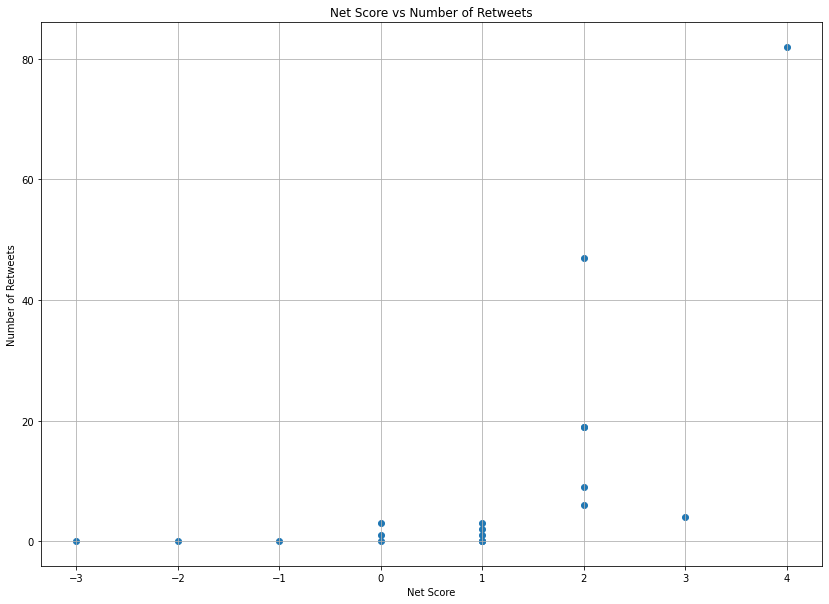

In [31]:
# Importing matplotlib.pyplot:
import matplotlib.pyplot as plt

# Initializing the variables to store the result:
retweets = []
net_score = []

# Reading the data from the resulting_data.csv file:
with open('resulting_data.csv', 'r') as f:
    lines = f.readlines()[1:]               # Reading without the header line
    for line in lines:
        data = line.strip().split(',')
        retweets.append(int(data[0]))
        net_score.append(int(data[-1]))

# print('Printing the number of retweets: ', retweets)
# print('Printing the net_score', net_score)

# Creating a figure with desired size
plt.figure(figsize=(14, 10))

# Plotting the results:
plt.scatter(net_score, retweets)

# Adding labels to the plot:
plt.xlabel('Net Score')
plt.ylabel('Number of Retweets')

# Adding title to the plot:
plt.title('Net Score vs Number of Retweets')

# Enabling the grid:
plt.grid(True)
plt.show()